In [68]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
df=pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])

In [70]:
df.head(6)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583


In [71]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [72]:
X=df.drop(columns=['Survived'])
y=df['Survived']

In [73]:
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size=0.8, random_state=1)

In [74]:
X_train['Age_Imputed']=X_train['Age']
X_test['Age_Imputed']=X_test['Age']


In [75]:
#Handling Missing values
X_train['Age_Imputed'][X_train['Age_Imputed'].isnull()]=X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_Imputed'][X_test['Age_Imputed'].isnull()]=X_test['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [76]:
X_train.sample(6)

,Age,Fare,Age_Imputed
378,20.0,4.0125,20.0
820,52.0,93.5000,52.0
840,20.0,7.9250,20.0
269,35.0,135.6333,35.0
379,19.0,7.7750,19.0
444,NaN,8.1125,31.0


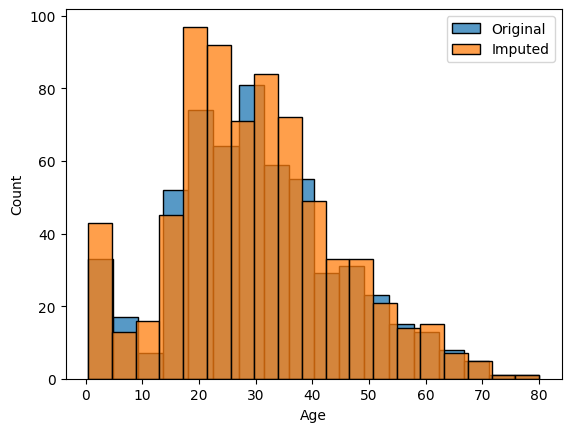

In [77]:
#EDA
sns.histplot(X_train['Age'], label='Original')
sns.histplot(X_train['Age_Imputed'], label='Imputed')

plt.legend()
plt.show()


In [78]:
print('Original Variance:', X_train['Age'].var())
print("Imputed Variance:", X_train['Age_Imputed'].var())

Original Variance: 220.7125508594779
Imputed Variance: 217.10319995812196


# For categorical dataset


In [79]:
data=pd.read_csv('train_1.csv', usecols=['GarageQual', 'FireplaceQu', 'SalePrice'])

In [80]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [81]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [82]:
X=data.drop(columns=['SalePrice'])
y=data['SalePrice']

In [83]:
X_train, X_test, y_train, y_test=train_test_split(X, y, train_size=0.8, random_state=3)

In [84]:
X_train['GarageQual_Imputed']=X_train['GarageQual']
X_test['GarageQual_Imputed']=X_test['GarageQual']


X_train['FireplaceQu_Imputed']=X_train['FireplaceQu']
X_test['FireplaceQu_Imputed']=X_test['FireplaceQu']



In [85]:
X_train

,FireplaceQu,GarageQual,GarageQual_Imputed,FireplaceQu_Imputed
727,NaN,TA,TA,NaN
328,NaN,TA,TA,NaN
958,NaN,TA,TA,NaN
126,TA,TA,TA,TA
1102,NaN,TA,TA,NaN
...,...,...,...,...
789,NaN,TA,TA,NaN
256,NaN,TA,TA,NaN
968,NaN,NaN,NaN,NaN
952,NaN,TA,TA,NaN


In [86]:
X_train['GarageQual_Imputed'][X_train['GarageQual_Imputed'].isnull()]=X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_Imputed'][X_test['GarageQual_Imputed'].isnull()]=X_test['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values



In [87]:
X_train['FireplaceQu_Imputed'][X_train['FireplaceQu_Imputed'].isnull()]=X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_Imputed'][X_test['FireplaceQu_Imputed'].isnull()]=X_test['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values


In [88]:
X_train

,FireplaceQu,GarageQual,GarageQual_Imputed,FireplaceQu_Imputed
727,NaN,TA,TA,Gd
328,NaN,TA,TA,Gd
958,NaN,TA,TA,Gd
126,TA,TA,TA,TA
1102,NaN,TA,TA,Gd
...,...,...,...,...
789,NaN,TA,TA,Gd
256,NaN,TA,TA,TA
968,NaN,NaN,TA,Fa
952,NaN,TA,TA,Gd


In [89]:
temp=pd.concat(
    [
        X_train['GarageQual'].value_counts()/len(X_train['GarageQual'].dropna()),
        X_train['GarageQual_Imputed'].value_counts()/len(X_train)
    ], axis=1
)
temp.columns=['Original', 'Imputed']



In [90]:
temp

,Original,Imputed
TA,0.951220,0.951199
Fa,0.037037,0.036815
Gd,0.008130,0.008562
Ex,0.001807,0.001712
Po,0.001807,0.001712
